## SVM Classifier for Salary Dataset

Prepare a classification model using SVM for salary data 

### Data Description:

* age -- age of a person
* workclass	-- A work class is a grouping of work 
* education	-- Education of an individuals	
* maritalstatus -- Marital status of an individulas	
* occupation	 -- occupation of an individuals
* relationship -- 	
* race --  Race of an Individual
* sex --  Gender of an Individual
* capitalgain --  profit received from the sale of an investment	
* capitalloss	-- A decrease in the value of a capital asset
* hoursperweek -- number of hours work per week	
* native -- Native of an individual
* Salary -- salary of an individual

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix

### Salary Dataset

In [2]:
train = pd.read_csv('SalaryData_Train.csv')
train.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
test = pd.read_csv('SalaryData_Test.csv')
test.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


### EDA

<AxesSubplot:xlabel='Salary', ylabel='count'>

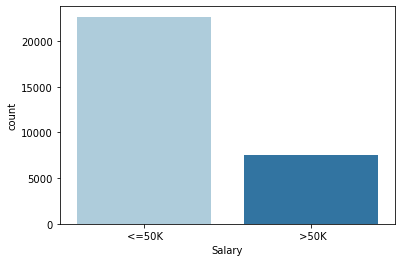

In [5]:
# Salary
sns.countplot(x = train.Salary, palette='Paired')

In [38]:
train.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='count'>

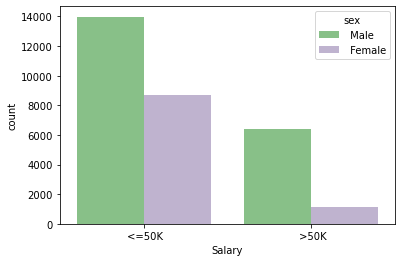

In [6]:
# Salary Gender 
sns.countplot(x = 'Salary', hue='sex', data=train, palette='Accent')

<AxesSubplot:xlabel='relationship', ylabel='count'>

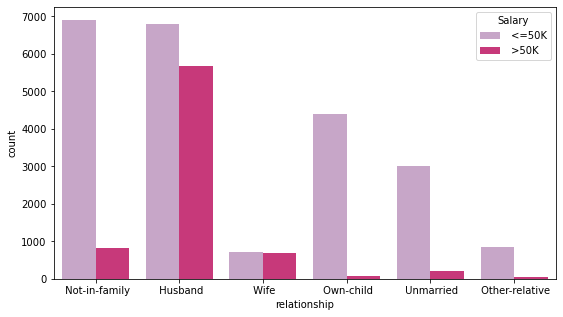

In [7]:
# Relationship
plt.figure(figsize=(9,5))
sns.countplot(x = 'relationship', palette='PuRd', hue='Salary', data=train)

<AxesSubplot:xlabel='race', ylabel='count'>

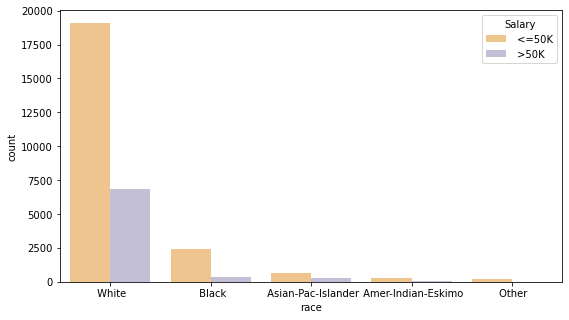

In [8]:
plt.figure(figsize=(9,5))
sns.countplot(x = 'race', hue='Salary', data=train, palette='PuOr')

<AxesSubplot:xlabel='race', ylabel='count'>

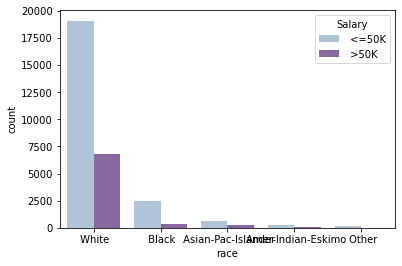

In [9]:
sns.countplot(x = 'race', palette='BuPu', hue='Salary', data=train)

<AxesSubplot:xlabel='Salary', ylabel='age'>

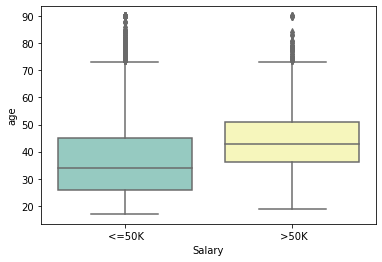

In [10]:
sns.boxplot(y='age', x='Salary', data=train, palette='Set3')

<AxesSubplot:xlabel='workclass', ylabel='age'>

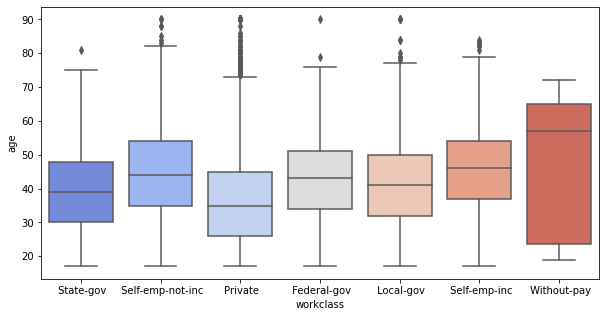

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x =train['workclass'], y=train['age'], palette='coolwarm')

In [12]:
# Remove feature without encoding
train = train.drop('education', axis=1) 
test = test.drop('education', axis=1) 

### Feature Encoding

In [13]:
labelencoder = LabelEncoder()
binaryencoder = LabelBinarizer()

cols = ['maritalstatus','workclass','occupation','relationship','native','race']

# Label Encoding
for i in cols:
    train[i] = labelencoder.fit_transform(train[i])
    test[i] = labelencoder.fit_transform(test[i])

    
# Binary encoding    
train.loc[:,'sex'] = binaryencoder.fit_transform(train.loc[:,'sex'])
train.loc[:,'Salary'] = binaryencoder.fit_transform(train.loc[:,'Salary'])

test.loc[:,'sex'] = binaryencoder.fit_transform(test.loc[:,'sex'])
test.loc[:,'Salary'] = binaryencoder.fit_transform(test.loc[:,'Salary'])

In [14]:
train.head(2) 

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,13,2,3,0,4,1,0,0,13,37,0


In [15]:
test.head(2)

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,7,4,6,3,2,1,0,0,40,37,0
1,38,2,9,2,4,0,4,1,0,0,50,37,0


In [16]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

### Build SVM Classifier

In [17]:
svm_model = SVC()

svm_model.fit(X_train, y_train)

SVC()

In [18]:
svm_model.score(X_train, y_train)

0.7960279831570571

### Prediction and Evaluation

In [20]:
predicted = svm_model.predict(X_test)

In [21]:
print(confusion_matrix(y_test,predicted))

[[10997   363]
 [ 2703   997]]


In [22]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



### Feature Selection

Feature: 0, Score: 0.21409
Feature: 1, Score: 0.04181
Feature: 2, Score: 0.12921
Feature: 3, Score: 0.11472
Feature: 4, Score: 0.08092
Feature: 5, Score: 0.14260
Feature: 6, Score: 0.01748
Feature: 7, Score: 0.01737
Feature: 8, Score: 0.08930
Feature: 9, Score: 0.02955
Feature: 10, Score: 0.10514
Feature: 11, Score: 0.01783


<BarContainer object of 12 artists>

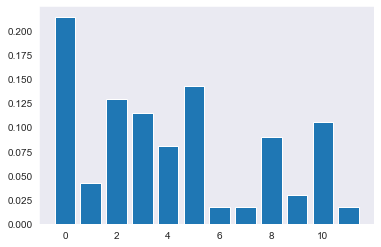

In [36]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

class_weights = {0:1,1:3}
model = RandomForestClassifier(criterion='gini', class_weight=class_weights)

# fit the model
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)

In [23]:
X_train1 = train.loc[:,['age','workclass','educationno','maritalstatus','occupation','relationship','capitalgain','capitalloss','hoursperweek']]
y_train1 = train.iloc[:,-1]

svm_model1 = SVC()
svm_model1.fit(X_train1, y_train1)

SVC()

In [24]:
svm_model1.score(X_train1, y_train1)

0.7960279831570571

In [25]:
predicted1 = svm_model1.predict(test.loc[:,['age','workclass','educationno','maritalstatus','occupation','relationship','capitalgain','capitalloss','hoursperweek']])

In [26]:
print(confusion_matrix(y_test,predicted1))

[[10997   363]
 [ 2703   997]]


### Under Sampling

In [20]:
import imblearn

In [21]:
train_0 = train[train['Salary'] == 0]
train_1 = train[train['Salary'] == 1]

In [22]:
train_0.shape, train_1.shape

((22653, 13), (7508, 13))

In [23]:
train_0_under = train_0.sample(7508, replace=True)

In [24]:
final_train = pd.concat([train_0_under,train_1],axis=0)

In [60]:
svm_model = SVC()

svm_model.fit(final_train.iloc[:,:-1], final_train['Salary'])

SVC()

In [61]:
predicted2 = svm_model.predict(X_test)

In [62]:
print(confusion_matrix(y_test,predicted2))

[[10851   509]
 [ 2609  1091]]


In [68]:
print(classification_report(y_test,predicted2))

              precision    recall  f1-score   support

           0       0.81      0.96      0.87     11360
           1       0.68      0.29      0.41      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.63      0.64     15060
weighted avg       0.78      0.79      0.76     15060



### SMOTE 

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
x = train.drop('Salary',axis=1)
y = train.Salary

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

In [69]:
svm3 = SVC()
svm3.fit(x_sm, y_sm)

SVC()

In [70]:
pre = svm3.predict(test.iloc[:,:-1])

In [71]:
print(classification_report(test['Salary'],pre))

              precision    recall  f1-score   support

           0       0.81      0.96      0.87     11360
           1       0.68      0.29      0.41      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.62      0.64     15060
weighted avg       0.78      0.79      0.76     15060



### Grid Search

In [16]:
param_grid = {'C': [0.1, 1000], 'gamma': [1,0.001], 'kernel': ['rbf']} #grid search parameters

In [18]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [25]:
a = final_train[['age','workclass','educationno','maritalstatus','occupation','relationship','capitalgain','capitalloss','hoursperweek']]
b =final_train['Salary']
grid.fit(a,b)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.536 total time=  18.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.601 total time=  18.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.631 total time=  18.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.576 total time=  18.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=  18.7s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.761 total time=  11.6s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.763 total time=  11.1s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.781 total time=  11.4s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.782 total time=  11.5s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.787 total time=  11.1s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.711 total time=  46.8s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1000], 'gamma': [1, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
a_test = test[['age','workclass','educationno','maritalstatus','occupation','relationship','capitalgain','capitalloss','hoursperweek']]

In [28]:
grid_predictions = grid.predict(a_test)

In [30]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85     11360
           1       0.55      0.88      0.68      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.82      0.76     15060
weighted avg       0.85      0.80      0.81     15060



### Recursive Feature Elimination

In [27]:
#RFE
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=400)
rfe = RFE(lr_model, n_features_to_select=3)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=400), n_features_to_select=3)

In [28]:
rfe.support_

array([False, False,  True,  True, False, False, False,  True, False,
       False, False, False])

In [29]:
rfe.ranking_

array([ 5,  4,  1,  1,  8,  2,  3,  1, 10,  9,  6,  7])

In [30]:
#new data of RFE
x_train_rfe = X_train.iloc[:,[3,4,6,8]]
x_test_rfe=X_test.iloc[:,[3,4,6,8]]

In [31]:
#model using RFE
svm = SVC(kernel = 'rbf', random_state = 0, gamma=0.10, C=1.0)
svm.fit(x_train_rfe, y_train)

SVC(gamma=0.1, random_state=0)

In [32]:
#train accuracy
svm.score(x_train_rfe,y_train)

0.8271940585524352

### Class Weights

In [37]:
class_weights = {0:1,1:3}
svm_wt = SVC(kernel = 'rbf', random_state = 0, gamma=0.10, C=1.0, class_weight=class_weights)
svm_wt.fit(x_train_rfe, y_train)

SVC(class_weight={0: 1, 1: 3}, gamma=0.1, random_state=0)

In [39]:
svm_wt.score(x_train_rfe,y_train)

0.7894963694837704

In [41]:
p = svm_wt.predict(x_test_rfe)

In [42]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     11360
           1       0.55      0.84      0.66      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.81      0.76     15060
weighted avg       0.84      0.79      0.80     15060



Thank you!